# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
import pandas as pd

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
#calculating number of datapoints per class.

import collections

train_class_counts = collections.Counter(y_train)
validity_class_counts = collections.Counter(y_valid)
test_class_counts = collections.Counter(y_test)
print("Training class conunts are : \n {}".format(train_class_counts))
print("\nValidity class conunts are : \n {}".format(validity_class_counts))
print("\nTest class conunts are : \n {}".format(test_class_counts))

Training class conunts are : 
 Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 35: 1080, 18: 1080, 17: 990, 31: 690, 14: 690, 33: 599, 26: 540, 15: 540, 28: 480, 23: 450, 30: 390, 16: 360, 34: 360, 6: 360, 36: 330, 22: 330, 40: 300, 20: 300, 39: 270, 21: 270, 29: 240, 24: 240, 41: 210, 42: 210, 32: 210, 27: 210, 37: 180, 19: 180, 0: 180})

Validity class conunts are : 
 Counter({1: 240, 13: 240, 2: 240, 4: 210, 5: 210, 38: 210, 10: 210, 12: 210, 3: 150, 11: 150, 9: 150, 8: 150, 7: 150, 25: 150, 35: 120, 18: 120, 17: 120, 31: 90, 33: 90, 14: 90, 15: 90, 36: 60, 26: 60, 23: 60, 40: 60, 22: 60, 16: 60, 34: 60, 6: 60, 30: 60, 21: 60, 20: 60, 28: 60, 41: 30, 37: 30, 19: 30, 42: 30, 0: 30, 32: 30, 27: 30, 29: 30, 24: 30, 39: 30})

Test class conunts are : 
 Counter({2: 750, 1: 720, 13: 720, 38: 690, 12: 690, 4: 660, 10: 660, 5: 630, 25: 480, 9: 480, 7: 450, 3: 450, 8: 450, 11: 420, 18: 390, 35: 390, 

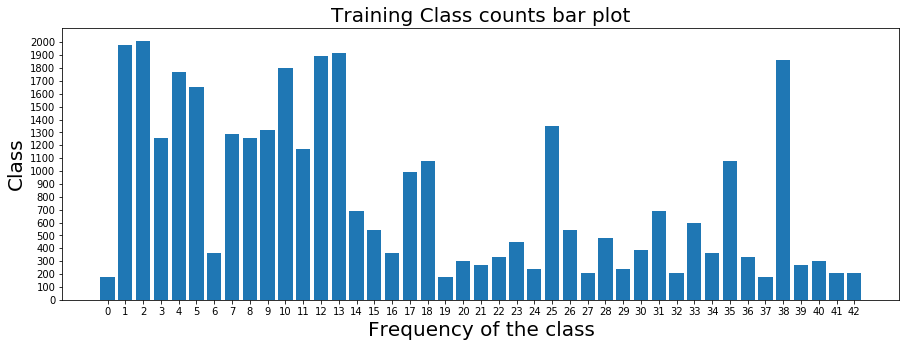

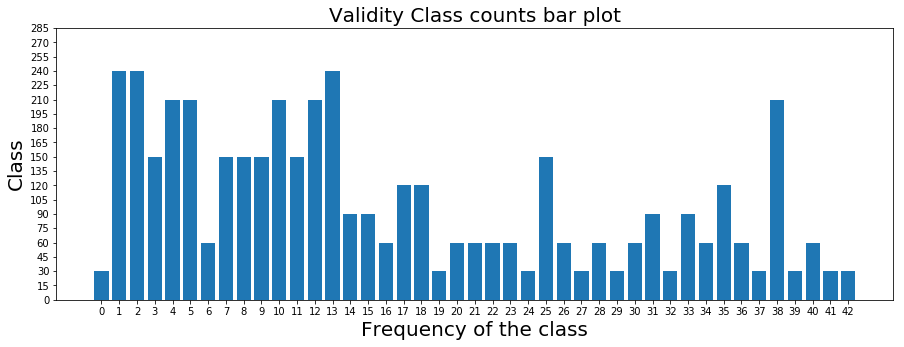

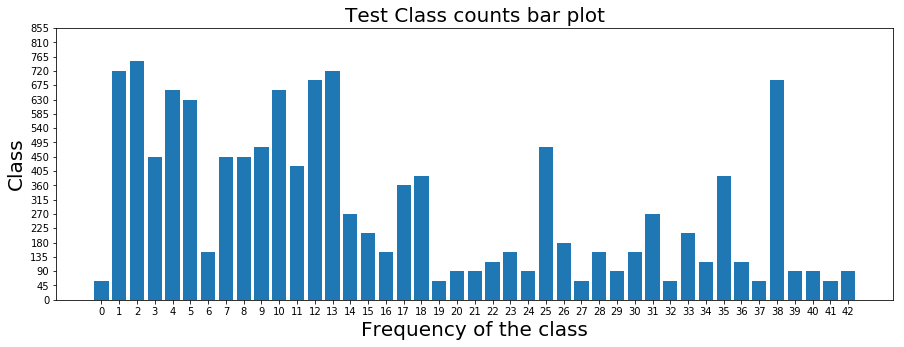

In [35]:
#plotting the bar graph for number points per class vs class.


plt.figure(figsize=(15, 5))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xticks(np.arange(0, n_classes, 1))
plt.yticks(np.arange(0, 2100, 100))
plt.title("Training Class counts bar plot", fontsize = 20)
plt.xlabel("Frequency of the class", fontsize = 20)
plt.ylabel("Class", fontsize = 20)
plt.savefig("./bar_plot_training.jpg")
plt.show()

plt.figure(figsize=(15, 5))
plt.bar(validity_class_counts.keys(), validity_class_counts.values())
plt.xticks(np.arange(0, n_classes, 1))
plt.yticks(np.arange(0, 300, 15))
plt.title("Validity Class counts bar plot", fontsize = 20)
plt.xlabel("Frequency of the class", fontsize = 20)
plt.ylabel("Class", fontsize = 20)
plt.savefig("./bar_plot_validation.jpg")
plt.show()

plt.figure(figsize=(15, 5))
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.xticks(np.arange(0, n_classes, 1))
plt.yticks(np.arange(0, 900, 45))
plt.title("Test Class counts bar plot", fontsize = 20)
plt.xlabel("Frequency of the class", fontsize = 20)
plt.ylabel("Class", fontsize = 20)
plt.savefig("./bar_plot_test.jpg")
plt.show()

**Distribution of data among various classes are almost similar in Train, Validation and testing data set.**

**Class distribution is very unbalanced like for some classes we have 10 times more data as compared to some other classes.**

**Classes which have less number of training samples can introduce some errors.**

**Data augmentation is required to increase number of data points per class.**

In [6]:
#Importing the data of classId to SignName.

import pandas as pd

filename = "./signnames.csv"

class_label = pd.read_csv(filename, header= 0)

print(class_label)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

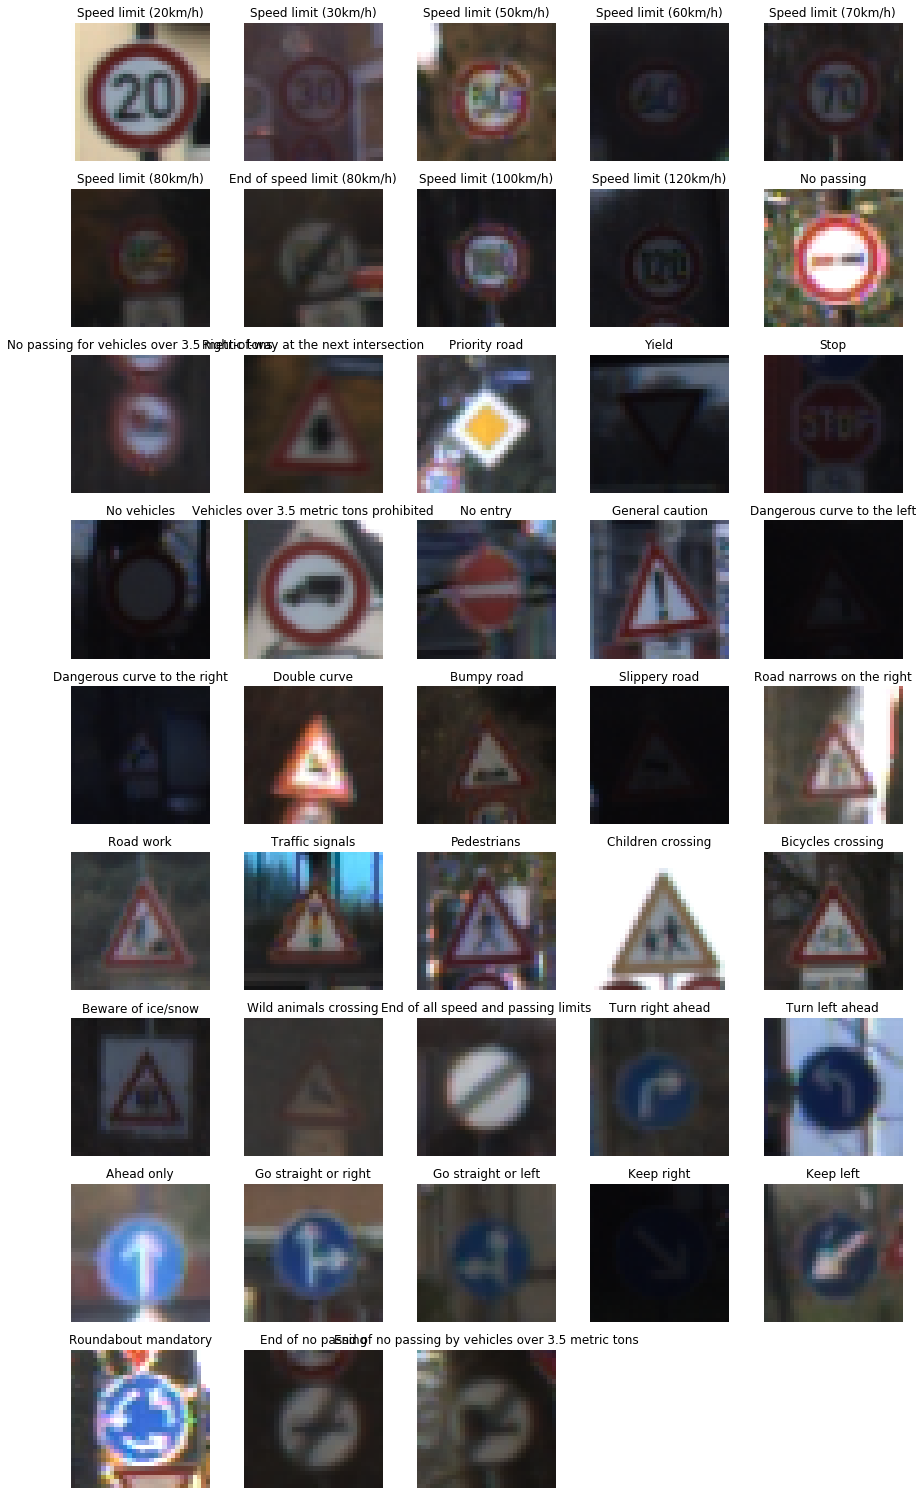

In [7]:
#plotting at least one image per class.

plt.figure(figsize=(15,30))

for sign_type in range(n_classes):
    image = X_train[y_train == sign_type]
    plt.subplot(10, 5 , sign_type+1)
    plt.imshow(image[0])
    plt.grid('off')
    plt.axis('off')
    plt.title(class_label["SignName"][sign_type])
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Normalizing data by using Min-Max scaling 

import cv2

def preprocess(image_data, image_label):
    image_data_pre = np.empty_like(image_data).astype(np.float32)
    print(image_data_pre.shape)
    for index in range(len(image_data)):
        image_data_pre[index] = (image_data[index] - np.min(image_data[index]))/(np.max(image_data[index]) - np.min(image_data[index])).astype(np.float32)
        #print(np.min(image_data_pre[index]), np.max(image_data_pre[index]))
    return image_data_pre, image_label

In [9]:
#Normalizing all 3 datasets.

X_train_p, y_train_p = preprocess(X_train, y_train)
X_valid_p, y_valid_p = preprocess(X_valid, y_valid)
X_test_p, y_test_p = preprocess(X_test, y_test)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [10]:
#Function to save data to a file.

import pickle

def save_data(filename, dictionary):
    with open(filename, "wb") as f:
        pickle.dump(dictionary, f)

In [11]:
#Saving the data to a file for later use

train_file = "../data/train_p.p"
valid_file = "../data/valid_p.p"
test_file = "../data/test_p.p"

d_train = {"features":X_train_p, "labels":y_train_p}
d_valid = {"features":X_valid_p, "labels":y_valid_p}
d_test = {"features":X_test_p, "labels":y_test_p}

save_data(train_file, d_train)
save_data(valid_file, d_valid)
save_data(test_file, d_test)


In [12]:
# Function to load the data from a file

import pickle

def load_data(filename):
    with open(filename, "rb") as f:
        data = pickle.load(f)
        X = data["features"]
        y = data["labels"]
    return X, y

In [13]:
#Loading the data from a file

train_file = "../data/train_p.p"
valid_file = "../data/valid_p.p"
test_file = "../data/test_p.p"

X_train_pre, y_train_pre = load_data(train_file)
X_valid_pre, y_valid_pre = load_data(valid_file)
X_test_pre, y_test_pre = load_data(test_file)

In [14]:
#Shuffling the data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train_pre, y_train_pre, random_state = 1)

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    tf.set_random_seed(1)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    
    
    # SOLUTION: Layer 3: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    
    

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    fc0 = flatten(conv2)
    #fc0 = tf.concat([branched_out, second_stage], 1)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train, random_state = 1)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid_pre, y_valid_pre)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.807
Validation Accuracy = 0.742

EPOCH 2 ...
Training Accuracy = 0.915
Validation Accuracy = 0.851

EPOCH 3 ...
Training Accuracy = 0.948
Validation Accuracy = 0.885

EPOCH 4 ...
Training Accuracy = 0.959
Validation Accuracy = 0.892

EPOCH 5 ...
Training Accuracy = 0.969
Validation Accuracy = 0.908

EPOCH 6 ...
Training Accuracy = 0.975
Validation Accuracy = 0.915

EPOCH 7 ...
Training Accuracy = 0.979
Validation Accuracy = 0.918

EPOCH 8 ...
Training Accuracy = 0.981
Validation Accuracy = 0.927

EPOCH 9 ...
Training Accuracy = 0.986
Validation Accuracy = 0.927

EPOCH 10 ...
Training Accuracy = 0.986
Validation Accuracy = 0.930

EPOCH 11 ...
Training Accuracy = 0.988
Validation Accuracy = 0.932

EPOCH 12 ...
Training Accuracy = 0.987
Validation Accuracy = 0.913

EPOCH 13 ...
Training Accuracy = 0.991
Validation Accuracy = 0.942

EPOCH 14 ...
Training Accuracy = 0.990
Validation Accuracy = 0.935

EPOCH 15 ...
Training Accuracy = 0.992
Valid

In [20]:
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('./lenet.meta'))
    saver.restore(sess, "./lenet")
    train_accuracy = evaluate(X_train_pre, y_train_pre)
    validation_accuracy = evaluate(X_valid_pre, y_valid_pre)
    test_accuracy = evaluate(X_test_pre, y_test_pre)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 0.998
Validation Accuracy = 0.943
Test Accuracy = 0.938


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [21]:
import os

image_list = os.listdir("./new_images/")
print(image_list)

['40_roundabout_mandatory.png', '39_keep_left.png', '35_Ahead_only.png', '38_keep_right.png', '33_turn_right_ahead.png']


In [22]:
def read_resize_images(path, img_name):
    image = cv2.imread(path + img_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
    return image
    

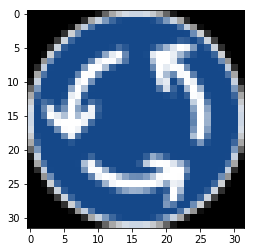

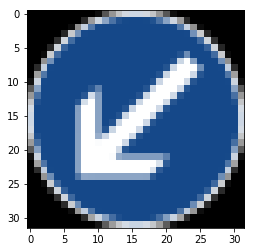

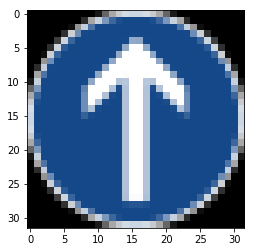

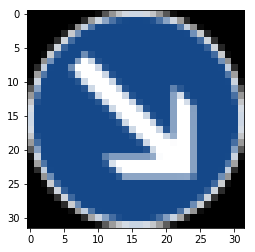

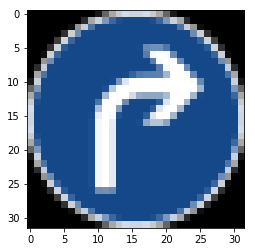

(5, 32, 32, 3) (5,)


In [23]:
path = "./new_images/"

new_images = []
new_image_label = []

for image_name in image_list:
    image = read_resize_images(path, image_name)
    new_images.append(image)
    label = image_name.split("_")[0]
    new_image_label.append(label)
    plt.imshow(image)
    plt.show()
    #print(label)
    
X_new_image = np.array(new_images)
y_new_image = np.array(new_image_label).astype(np.int8)

print(X_new_image.shape, y_new_image.shape)

In [24]:
new_image_file = "../data/new_image.p"
new_image_dict = {"features":X_new_image, "labels":y_new_image}

save_data(new_image_file, new_image_dict)

In [25]:
X_new_image, y_new_image = load_data(new_image_file)

### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_new_image_p, y_new_image_p = preprocess(X_new_image, y_new_image)

(5, 32, 32, 3)


### Analyze Performance

In [27]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('./lenet.meta'))
    saver.restore(sess, "./lenet")
    new_image_accuracy = evaluate(X_new_image_p, y_new_image)
    
    print("New Image Accuracy = {:.3f}".format(new_image_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
New Image Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [28]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
feed_dict = {x: X_new_image_p, y: y_new_image_p, keep_prob: 1}
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    predictions = sess.run(logits,feed_dict = feed_dict)
    softmax = sess.run(tf.nn.softmax(predictions))
    top5_pred = sess.run(tf.nn.top_k(softmax, 5))
    #print(top5_pred)
    print(top5_pred)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  9.99999046e-01,   8.75103979e-07,   9.41090974e-08,
          1.93898657e-08,   8.40613446e-09],
       [  9.99972343e-01,   2.52689624e-05,   2.32660864e-06,
          1.02520206e-08,   4.69061145e-09],
       [  1.00000000e+00,   3.98977704e-08,   9.58189617e-09,
          6.36133368e-09,   2.40078224e-09],
       [  1.00000000e+00,   5.99622574e-11,   2.00887646e-13,
          6.71220417e-14,   1.60697007e-14],
       [  9.99998093e-01,   1.17867319e-06,   5.46484614e-07,
          6.00408541e-08,   1.76699171e-08]], dtype=float32), indices=array([[40,  6, 33, 11, 12],
       [39, 33, 40,  7, 37],
       [35, 20, 12, 40, 38],
       [38, 31, 25, 40, 11],
       [33, 39, 40,  7,  8]], dtype=int32))


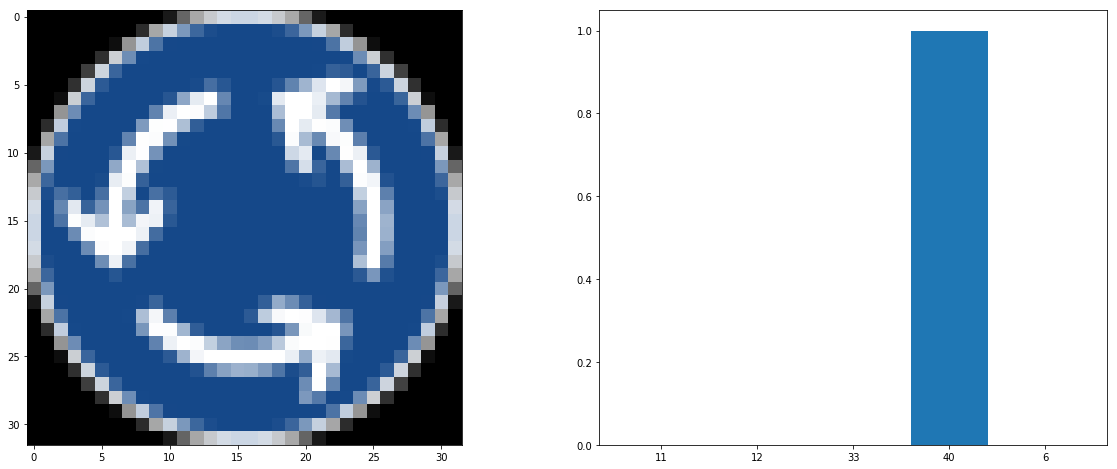

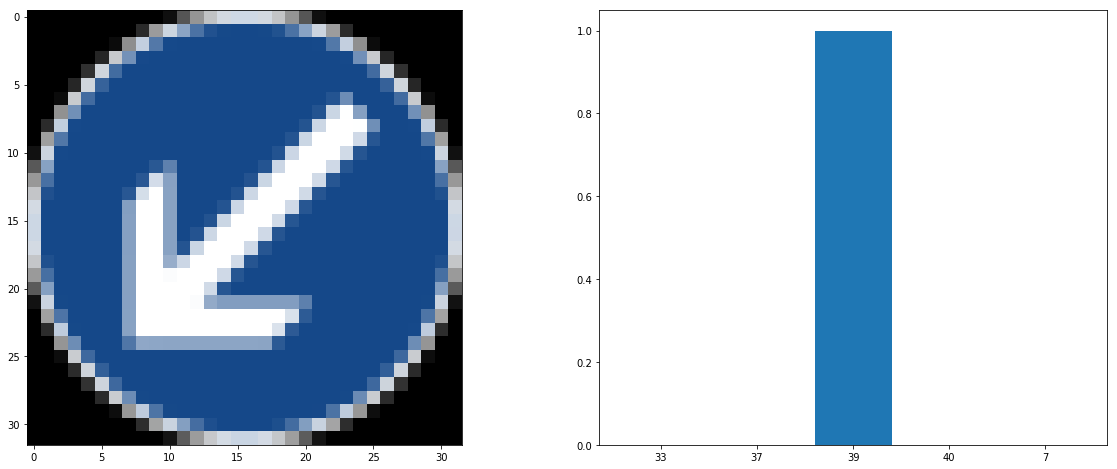

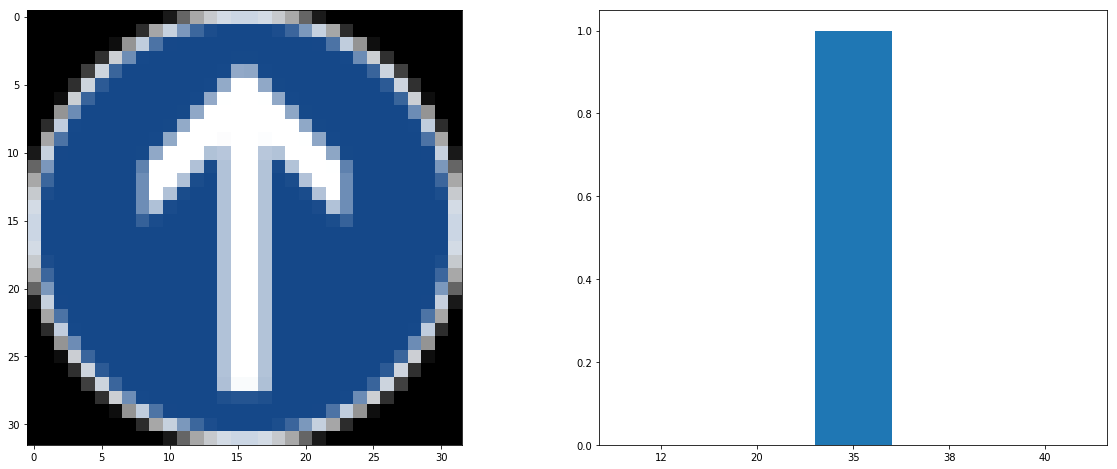

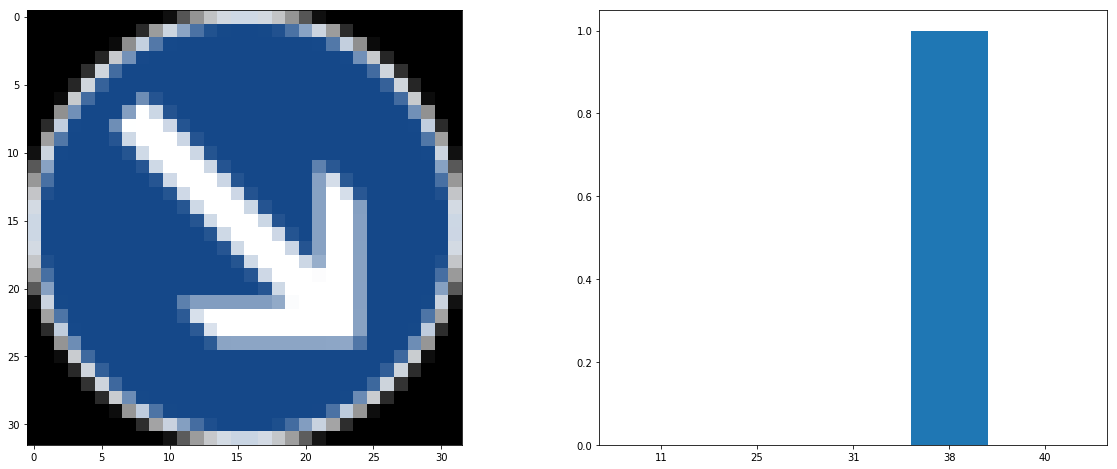

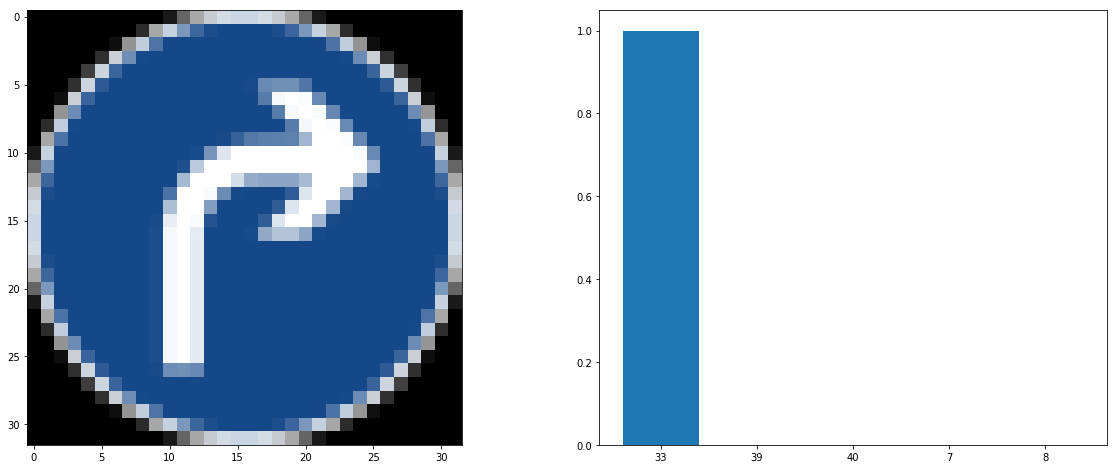

In [33]:
top5_pred[0][1]

for i in range(5):
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    
    plt.imshow(X_new_image[i])
    
    plt.subplot(1, 2, 2)
    plt.bar(top5_pred[1][i].astype(np.character), top5_pred[0][i])
    #plt.xticks(np.arange(0, 43, 1))
    #plt.yticks(np.arange(0, 1, 0.01))
    plt.savefig("./probability" + str(i+1) + ".jpg")
    plt.show()
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

# Project Writeup

## Traffic Sign classifier

[image1]: ./bar_plot_training.jpg
[image2]: ./bar_plot_validation.jpg
[image3]: ./bar_plot_test.jpg
[image4]: ./probability1.jpg
[image5]: ./probability2.jpg
[image6]: ./probability3.jpg
[image7]: ./probability4.jpg
[image8]: ./probability5.jpg

### Data Set Summary & Exploration


#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I have used **len()** function, **len(np.unique())**, **shape attribute** to get the following summary of the data set.

**Number of training examples = 34799**

**Number of testing examples = 12630**

**Image data shape = (32, 32, 3)**

**Number of classes = 43**

further **collections.Counter()** function has been used to get count for each class in all 3 data sets. This information is further used to plot the bar chart.



#### 2. Include an exploratory visualization of the dataset.

From the analysis of the bar graphs, following things were found:

1. Classes are very imbalanced in all three, train, test and validation, datasets. Some classes are 10 times more than the some other classes.

2. Classes are distributed in similar fashion in all three datasets.

Bar plots of the number of datapoints against each class is included in this jupyter notebook. Also included here.

![training_bar_plot][image1]
![Validation_bar_plot][image2]
![test_bar_plot][image3]


### Design and Test a Model Architecture

I just chose to normalize the datasets. For that I used Min-Max scaling to normalize the data. Normalizing the data brings everything on the same scale which between 0 to 1 in Min-Max scaling which further speeds up training procedure.

I used LeNet5 model which was given in the CNN module of this course and dropout layer was added in each convolution stage.

Following is the final model.

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 5x5x3x6   | 1x1 stride, VALID padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				    |
| Dropout	      	    | With keep probability as 0.7 during training 	|
| Convolution 5x5x6x16	| 1x1 stride, VALID padding, outputs 10x10x16   |
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x6 				    |
| Dropout	      	    | With keep probability as 0.7 during training 	|
| Fully connected		| Flatten layer with 400 input and 120 output   |
| RELU					|												|
| Fully connected		| Flatten layer with 120 input and 84 output    |
| RELU					|												|
| Fully connected		| Flatten layer with 84 input and 43 output     |
| Softmax				|         									    |



#### Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

I used **AdamOptimizer** with **batch size = 128**, **epochs = 30** and **learning rate = 0.001** to train the model.

I used following methods to train the model and to reach to the final model.

1. First I trained the model directly on the training set which was giving around 0.9 accuracy on validation set but around 0.997 accuracy on training set. 

2. Then i normalized the data by using Min-Max scaling which improved the validation set accuracy till 0.91 but again it was less than the minimum accuracy of 0.935.

3. So that was clear from the training set and validation set accuracies that model was overfitting.

4. To remove ovefitting, we can have some approaches like **dropout**, **Regularization** or **adding more data**.

5. I chose **dropout** method to reduce the overfitting of the model and chose **keep_prob = 0.7** for training and **keep_prob = 1** for calculating the accuracies.

6. **Dropout** method introduces **dropout layer** in each convolution layer after **maxpooling** layer.

7. FInally I was able to get following accuracies on all three datasets.

**Train Accuracy = 0.998**

**Validation Accuracy = 0.949**

**Test Accuracy = 0.938**



### Test a Model on New Images

I downloaded 5 images from the internet. All images werehaving different dimensions as compared to the original dataset image dimension of 32x32x3. So I used **cv2.resize** method to get the required input dimension.

Following 5 images were downloaded.

1. 40_roundabout_mandatory.png 

2. 39_keep_left.png 

3. 35_Ahead_only.png 

4. 38_keep_right.png 

5. 33_turn_right_ahead.png

All 5 images are given in the jupyter notebook.

Further all 5 images were normalized by using Min-Max scaling.

Then accuracy was measured by using saved model and model could easily recognize the all 5images.

downloaded images were very clear and standard images and there was no noise in the images so model could easily able to give 100% accuracy on the new images which is very much inline with accuracy on the test set.

Softmax probablities were calculated by using logits for the new images. Visualization is given in this notebook.

From the graphs it is evident that probability of correct predicted class is much much higher than the other classes. Folloiwing are the graphs of all 5 images.

![image_1][image4]
![image_2][image5]
![image_3][image6]
![image_4][image7]
![image_5][image8]

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.